In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
pd.__version__

'1.0.1'

In [150]:
from sklearn.linear_model import LinearRegression

In [151]:
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [152]:
source = './workspace/dataset_covid/covid19countryinfo.csv'
cols = ['country','pop','tests','testpop','density','medianage','urbanpop','quarantine','schools','restrictions','hospibed','smokers','sex0','sex14','sex25','sex54','sex64','sex65plus','sexratio','lung','femalelung','malelung']
descritive_df = pd.read_csv(source, usecols=cols, quotechar='"', engine='python', sep=',', error_bad_lines=False)

In [153]:
descritive_df = descritive_df.dropna(how='all')

In [154]:
descritive_df[descritive_df['country']=='France']

,country,pop,tests,testpop,density,medianage,urbanpop,quarantine,schools,restrictions,...,sex0,sex14,sex25,sex54,sex64,sex65plus,sexratio,lung,femalelung,malelung
51,France,"65,273,511",11071.0,5895.90019,119.0,42.0,82.0,3/17/2020,NaN,NaN,...,1.05,1.05,1.05,1.01,0.93,0.75,0.96,13.15,9.64,17.69


In [155]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,16,21,22,22,22,24,24,40,40,74
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,42,51,55,59,64,70,76,89,104,123
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,48,54,60,74,87,90,139,201,230,264
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,2,39,39,53,75,88,113,133,164
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,1,2,2,3,3


In [156]:
countries = df['Country/Region'].unique()
df_filtered = df[df['Country/Region'].isin(['France', 'Germany', 'United Kingdom', 'Italy', 'Spain', 'US']) & df['Province/State'].isna()]
df_filtered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
116,NaN,France,46.2276,2.2137,0,0,2,3,3,3,...,4499,6633,7652,9043,10871,12612,14282,16018,19856,22304
120,NaN,Germany,51.0000,9.0000,0,0,0,0,0,1,...,5795,7272,9257,12327,15320,19848,22213,24873,29056,32986
137,NaN,Italy,43.0000,12.0000,0,0,0,0,0,0,...,24747,27980,31506,35713,41035,47021,53578,59138,63927,69176
201,NaN,Spain,40.0000,-4.0000,0,0,0,0,0,0,...,7798,9942,11748,13910,17963,20410,25374,28768,35136,39885
223,NaN,United Kingdom,55.3781,-3.4360,0,0,0,0,0,0,...,1140,1543,1950,2626,2689,3983,5018,5683,6650,8077
225,NaN,US,37.0902,-95.7129,1,1,2,2,5,5,...,3499,4632,6421,7783,13677,19100,25489,33276,43847,53740


In [157]:
index = [col for col in df.columns if col not in ['Lat', 'Long', 'Country/Region', 'Province/State']]
#df_filtered.pivot(index=index, columns=['Country/Region'])

In [158]:
df_pivot = df_filtered[index].T
df_pivot.columns = list(df_filtered['Country/Region'])
countries_lst = df_pivot.columns

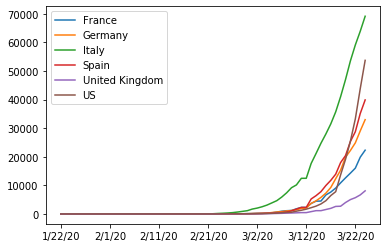

In [159]:
df_pivot.plot()

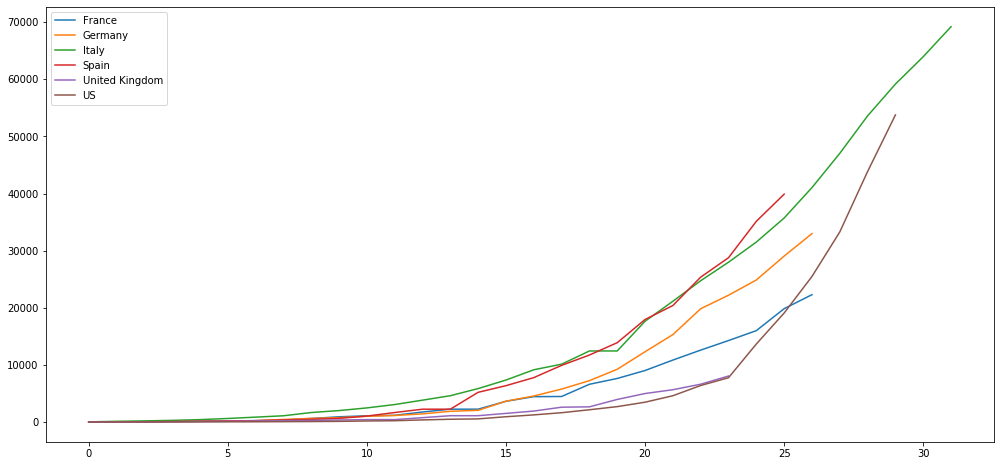

In [166]:
fig, ax = plt.subplots(1, figsize=(17,8))
for col in countries_lst:
    ts = df_pivot[df_pivot[col]>=30][col].reset_index(drop=True)
    ts.plot(ax=ax)
plt.legend()

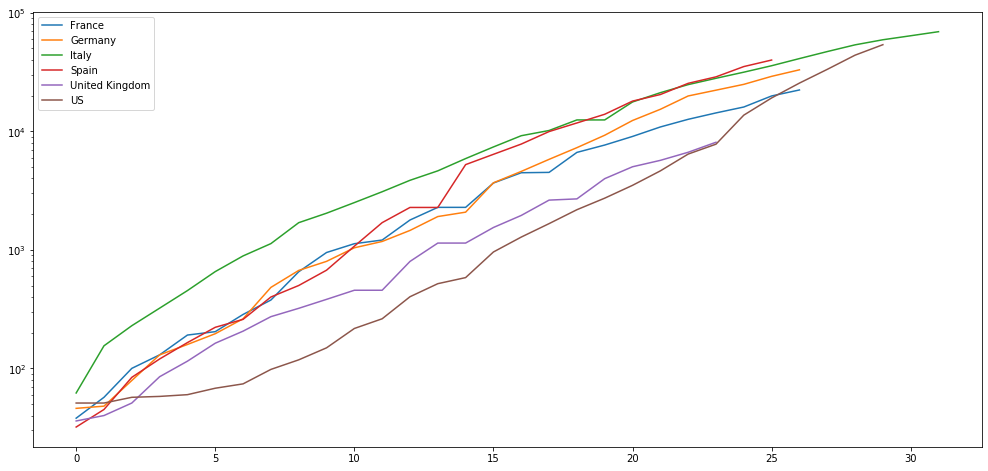

In [161]:
fig, ax = plt.subplots(1, figsize=(17,8))
for col in countries_lst:
    ts = df_pivot[df_pivot[col]>=30][col].reset_index(drop=True)
    #ts['school closure'] = descritive_df['schools']
    #ts = ts
    ts.plot(ax=ax)
plt.yscale('log')
plt.legend()

In [162]:
df_pivot[['{}_growth'.format(col) for col in countries_lst]] = df_pivot.diff()/df_pivot

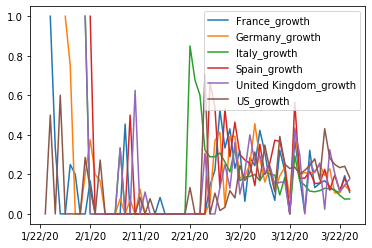

In [163]:
df_pivot.filter(regex='growth').plot()

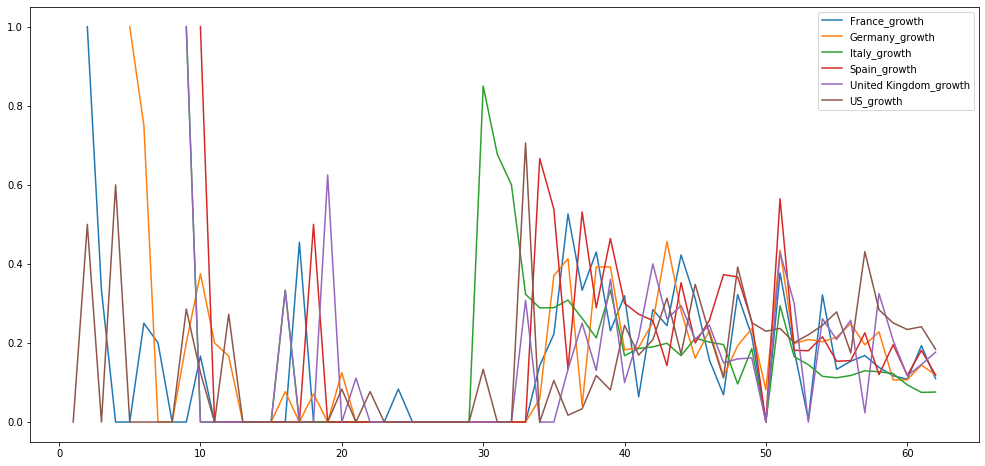

In [164]:
fig, ax = plt.subplots(1, figsize=(17,8))
growth = df_pivot.filter(regex='growth').columns
for col in growth:
    ts = df_pivot[col].reset_index(drop=True)
    ts.plot(ax=ax)
plt.legend()